# Zadatak za vežbu

Jedan od načina za prepoznavanje odudarajućih podataka u skupu podataka sa (približno) normalnom raspodelom je računanje takozvanog `Z-skora` odgovarajuće instance. Z-skor je numerička vrednost koja se pridružuje instanci $x$ na osnovu srednje vrednosti i standardne devijace grupe instanci kojoj pripada po formuli $\frac{x-mean}{std}$ u kojoj $mean$ označava srednju vrednost, a $std$ standardnu devijaciju grupe. Primetimo da na ovaj način dobijamo vrednosti koje su centrirane oko nule i sa jediničnom standardnom devijacijom. Kako u skupu podataka sa normalnom raspodelom možemo proglasiti odudarajućim podacima podatke u pojasu sa standardom devijacijom većom ili manjom od $3\sigma$, dovoljno je proveriti da li dobijeni z-skorovi odstupaju od vrednosti 3 tj. -3 da bi izdvojili odudarajuće podatke.

<img src='assets/z-score.png'>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

a) Sa [ove](https://www.kaggle.com/mustafaali96/weight-height) adrese, preuzeti skup podataka `weight-height.csv` koji se odnosi na vezu između težina i visina osoba. Učitati podatke koji se nalaze u ovoj datoteci, a potom prikazati neke osnovne informacije o njima.

In [2]:
data = pd.read_csv('data/weight-height.csv')

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.shape

(10000, 3)

In [5]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


b) Prikazati histograme visina i težina, kao i broj muškaraca i žena u skupu podataka. 

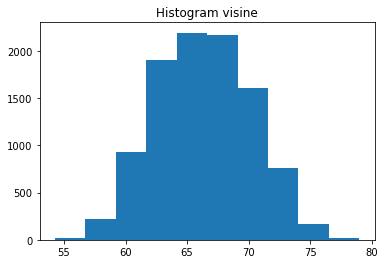

In [6]:
plt.hist(data['Height'])
plt.title('Histogram visine')
plt.show()

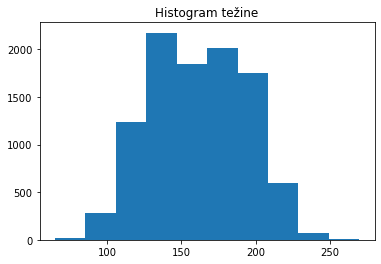

In [7]:
plt.hist(data['Weight'])
plt.title('Histogram težine')
plt.show()

Primetimo da gornji histogrami ukazuju na normalnu raspodelu veličina.

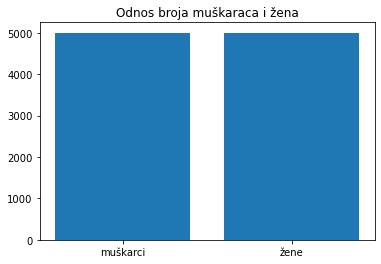

In [8]:
plt.bar(['muškarci', 'žene'], [data[data['Gender']=='Male'].shape[0], data[data['Gender']=='Female'].shape[0]])
plt.title('Odnos broja muškaraca i žena')
plt.show()

Na osnovu ovog grafikona zaključujemo da imamo jednak broj muškaraca i žena u skupu.

c) Prikazati tačkastim grafikonom zavisnost visine od težine.

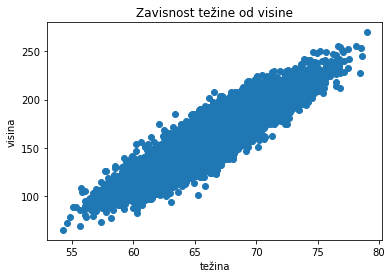

In [9]:
plt.xlabel('težina')
plt.ylabel('visina')
plt.title('Zavisnost težine od visine')
plt.scatter(data['Height'], data['Weight'])
plt.show()

d) Za svaku instancu izračunati apsolutnu vrednost Z-skora u koloni `Height`.

In [10]:
height_mean = data['Height'].mean()
height_std = data['Height'].std()

In [11]:
z_scores_height = np.abs(data['Height'] - height_mean) / height_std

e) Za svaku instancu izračunati apsolutnu vrednost Z-skora u koloni `Weight`.

In [12]:
weight_mean = data['Weight'].mean()
weight_std = data['Weight'].std()

In [13]:
z_scores_weight = np.abs(data['Weight'] - weight_mean) / weight_std

f) Izdvojiti instance skupa podataka kod kojih je vrednost z-skora težina ili visina veća od 3 ili manja od -3.

In [14]:
outliers_height = np.where((z_scores_height < -3) | (z_scores_height > 3))[0]

In [15]:
outliers_height

array([ 994, 1317, 2014, 3285, 3757, 6624, 9285])

In [16]:
outliers_weight = np.where((z_scores_weight < -3) | (z_scores_weight > 3))[0]

In [17]:
outliers_weight

array([2014, 9285])

Možemo primetiti da su indeksi ove dve instance već sadržani među indeksima odudarajućih podataka po visini.

g) Prikazati izdvojene tačke na grafiku zavisnosti visine od težine crvenom bojom.

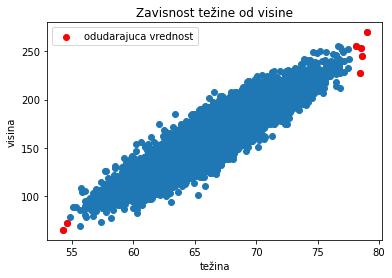

In [18]:
plt.xlabel('težina')
plt.ylabel('visina')
plt.title('Zavisnost težine od visine')
plt.scatter(data['Height'], data['Weight'])
plt.scatter(data.iloc[outliers_height]['Height'], data.iloc[outliers_height]['Weight'], c='red', label='odudarajuca vrednost')
plt.legend()
plt.show()

h) Obrisati odudarajuće vrednosti i sačuvati dobijeni skup podataka.

In [19]:
data.drop(index=outliers_height, inplace=True)

In [20]:
data.to_csv('data/weight-height-clean.csv')